/home/romuald/ENSEIGNEMENT/0-JupyterNotebooks/pyPhysChem



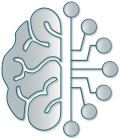

**Start at:** Wednesday 14 February 2024, 14:45:58  
**Hostname:** insa-12842 (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import fg,bg,hl,color
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

# Physical Chemistry Problems and Solutions

## Introduction

<div class="rqT" title = "Recommendation">

A basic knowledge and skills in the Python language and in the use of Computer Algebra Systems (CAS) is mandatory

You can first check whether you have such skills or whether you need to develop them with the ["Python in the Physical Chemistry Lab (PPCL)" in a nutshell](./PPCL.ipynb) and [Computer Algebra System with Python (pCAS) in a nutshell](./pCAS.ipynb) notebooks.

</div>

## Prerequisite : physical constants and conversion factors

<div class="rqT" title="Directives">
    
It is recommended to use the [physical constants of the SciPy library](https://docs.scipy.org/doc/scipy/reference/constants.html) instead of a copy/paste of values found on internet.

**Run the next cell to import all necessary libraries as well as to initialize the physical constants and conversion factors necessary all throughout this notebook.**

</div>

In [2]:
import scipy.constants as sc
import numpy as np
import math as m
from matplotlib import pyplot as plt
import sympy as sp
import molmass as mm

c = sc.value("speed of light in vacuum")
kB = sc.value("Boltzmann constant")
NA = sc.value("Avogadro constant")

h = sc.value("Planck constant")
hbar = sc.value("reduced Planck constant")
e = sc.value("elementary charge")
me = sc.value("electron mass")
mp = sc.value("proton mass")
a0 = sc.value("Bohr radius")
eps0 = sc.value("vacuum electric permittivity")
Rinf = sc.value("Rydberg constant")

t4pPC.centerTitle(f"Physical constants. Name of the variable: (physical constant, unit, uncertainty)")

print(f'{hl.BOLD}speed of light in vacuum, {fg.RED}c{fg.BLACK} variable: {sc.physical_constants["speed of light in vacuum"]}{hl.OFF}')
print(f'{hl.BOLD}Boltzmann constant, {fg.RED}kB{fg.BLACK} variable: {sc.physical_constants["Boltzmann constant"]}{hl.OFF}')
print(f'{hl.BOLD}Avogadro constant, {fg.RED}NA{fg.BLACK} variable: {sc.physical_constants["Avogadro constant"]}{hl.OFF}')
print()
print(f'{hl.BOLD}Planck constant, {fg.RED}h{fg.BLACK} variable: {sc.physical_constants["Planck constant"]}{hl.OFF}')
print(f'{hl.BOLD}Reduced Planck constant, {fg.RED}hbar{fg.BLACK} variable: {sc.physical_constants["reduced Planck constant"]}{hl.OFF}')
print(f'{hl.BOLD}Elementary charge, {fg.RED}e{fg.BLACK} variable: {sc.physical_constants["elementary charge"]}{hl.OFF}')
print(f'{hl.BOLD}Electron mass, {fg.RED}me{fg.BLACK} variable: {sc.physical_constants["electron mass"]}{hl.OFF}')
print(f'{hl.BOLD}Proton mass, {fg.RED}mp{fg.BLACK} variable: {sc.physical_constants["proton mass"]}{hl.OFF}')
print(f'{hl.BOLD}Vacuum electric permittivity, {fg.RED}eps0{fg.BLACK} variable: {sc.physical_constants["vacuum electric permittivity"]}{hl.OFF}')
print(f'{hl.BOLD}Rydberg constant, {fg.RED}Rinf{fg.BLACK} variable: {sc.physical_constants["Rydberg constant"]}{hl.OFF}')
print(f'{hl.BOLD}Bohr radius, {fg.RED}a0{fg.BLACK} variable: {sc.physical_constants["Bohr radius"]}{hl.OFF}')


print()
t4pPC.centerTitle(f"Conversion factors")
Eh = 2*Rinf*h*c
h2eV = Eh/e
print(f"{fg.BLUE}{hl.BOLD}hartree (h) to electron-volt (eV) conversion factor, {fg.RED}h2eV{fg.BLUE} variable: 1 h = {h2eV:.3f} eV{hl.OFF}")
u2kg = 1e-3/NA
print(f"{fg.BLUE}{hl.BOLD}unified atomic mass unit (u) to kilogram (kg) conversion factor, {fg.RED}u2kg{fg.BLUE} variable: 1 u = {u2kg:.3e} kg{hl.OFF}")
ev2nm = h*c*1e9/e
print(f"{fg.BLUE}{hl.BOLD}electron-volt (eV) to nanometer (nm) conversion factor, {fg.RED}ev2nm{fg.BLUE} variable: 1 eV = {ev2nm:.1f} nm{hl.OFF}")
D2Cm = 1e-21/c
print(f"{fg.BLUE}{hl.BOLD}debye (D) to Coulomb meter (C.m) conversion factor, {fg.RED}D2Cm{fg.BLUE} variable: 1 D = {D2Cm:.3e} C.m{hl.OFF}")

speed of light in vacuum, c variable: (299792458.0, 'm s^-1', 0.0)
Boltzmann constant, kB variable: (1.380649e-23, 'J K^-1', 0.0)
Avogadro constant, NA variable: (6.02214076e+23, 'mol^-1', 0.0)

Planck constant, h variable: (6.62607015e-34, 'J Hz^-1', 0.0)
Reduced Planck constant, hbar variable: (1.054571817e-34, 'J s', 0.0)
Elementary charge, e variable: (1.602176634e-19, 'C', 0.0)
Electron mass, me variable: (9.1093837015e-31, 'kg', 2.8e-40)
Proton mass, mp variable: (1.67262192369e-27, 'kg', 5.1e-37)
Vacuum electric permittivity, eps0 variable: (8.8541878128e-12, 'F m^-1', 1.3e-21)
Rydberg constant, Rinf variable: (10973731.56816, 'm^-1', 2.1e-05)
Bohr radius, a0 variable: (5.29177210903e-11, 'm', 8e-21)



hartree (h) to electron-volt (eV) conversion factor, h2eV variable: 1 h = 27.211 eV
unified atomic mass unit (u) to kilogram (kg) conversion factor, u2kg variable: 1 u = 1.661e-27 kg
electron-volt (eV) to nanometer (nm) conversion factor, ev2nm variable: 1 eV = 1239.8 nm
debye (D) to Coulomb meter (C.m) conversion factor, D2Cm variable: 1 D = 3.336e-30 C.m


## Rotational spectroscopy

<div class="intro">
    
[wikipedia page](https://en.wikipedia.org/wiki/Rotational_spectroscopy)

</div>

### Moment of inertia of the water molecule

<div class="exE">

1. Print the H and O masses available in the`molmass` library, and store them in `mH` and  `mO` variables
2. Convert them in kg
3. What is the formula that gives the moment of inertia of a molecule?
4. Calculate the moment of inertia of a water molecule about the axis defined by the bisector of the angle HOH. The angle HOH measures 104.5° and the OH bond measures 95.7 pm

</div>

In [72]:
# insert your code here



<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [77]:
# %load ./SolutionsToExercises/PhysChemPbSol/I_H2O.py

### Value of *J* corresponding to the most highly populated rotational energy level of a linear rotor at a temperature *T*

<div class="intro">

The population $\mathcal{P}_{J}$ of a rotational state at a given temperature *T* depends on two factors, the Boltzmann factor $\exp\left(-\frac{E_{J}}{k_{\mathrm{B}}T}\right)$ and the degeneracy of the rotational level, $g_J$. 

$$\mathcal{P}_{J}=g_{J}\exp\left(-\frac{E_{J}}{k_{\mathrm{B}}T}\right)=(2J+1)\exp\left(-\frac{E_{J}}{k_{\mathrm{B}}T}\right)$$

where:

$$E_{J}=hc\bar{B}J(J+1)$$

$\bar{B}$ is the rotational constant, defined as a wavenumber, *i.e.* in m<sup>-1</sup> and *J* is the rotational quantum number, which takes integer values between 0 and +∞. 

</div>

<div class="exE">

1. Define the population $\mathcal{P}_{J}$ as a `sympy` equation
2. Check that *J*<sub>max</sub>, the rotational level that has the highest probability to be occupied, is given by the equation

$$J_{\mathrm{max}}=\left(\frac{k_{\mathrm{B}}T}{2hc\bar{B}}\right)^{1/2}-\frac{1}{2}$$ 

</div>

In [ ]:
# insert your code here



<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [ ]:
# %load ./SolutionsToExercises/PhysChemPbSol/JmaxEq.py

<div class="exE">

The rotational constant of the linear O=C=S molecule is $\bar{B}$ = 0.20286 cm<sup>-1</sup>

1. Calculate *J*<sub>max</sub> at room temperature
2. Plot *J*<sub>max</sub> as a function of *T*, in the range [0K, 1000K]

</div>

In [ ]:
# insert your code here



<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [ ]:
# %load ./SolutionsToExercises/PhysChemPbSol/JmaxPlot.py

### Interatomic bond length of the <sup>1</sup>H<sup>79</sup>Br diatomic molecule

<div class="exE">

The rotational spectrum of the <sup>1</sup>H<sup>79</sup>Br molecule is made up of equidistant vertical lines, with $\Delta \bar{\nu}$ = 16.702 cm<sup>-1</sup>. All equations will be written for the linear rotor:

1. Print the <sup>1</sup>H and <sup>79</sup>Br masses available in the`molmass` library, and store them in `m1H` and  `m79Br` variables
2. Define the $F_J$ equation as a `sympy` equation
3. Express $\Delta \bar{\nu}$ as a function of $\bar{B}$
</div>

In [ ]:
# insert your code here



<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [26]:
# %load ./SolutionsToExercises/PhysChemPbSol/HBr-part1.py

<div class="exE">

4. For the linear rotor, the moment of inertia *I* is related to $\bar{B}$ by the equation:
   $$I = \frac{\hbar}{4\pi c \bar{B}}$$
   For a diatomic molecule, *I* is also given by:
   $$I = \mu R_\mathrm{eq}^2$$
   where $\mu$ is the reduced mass of the molecule.
   
   1. Express $R_\mathrm{eq}$ as a function of *I*, $\mu$ and $\bar{B}$
   2. Calculate $\mu$ 
   3. Calculate the equilibrium bond length of the <sup>1</sup>H<sup>79</sup>Br diatomic molecule

</div>

In [ ]:
# insert your code here



<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [ ]:
# %load ./SolutionsToExercises/PhysChemPbSol/HBr-part2.py

### Simulation of the rotational spectrum of a molecule in the framework of the rigid rotor model

<div class="intro">

As already recalled, the energy of a rigid linear rotor is given by:

$$E_{J}=hc\bar{B}J(J+1)$$

$\bar{B}$ is the rotational constant, defined as a wavenumber, *i.e.* in m<sup>-1</sup> and *J* is the rotational quantum number, which takes integer values between 0 and +∞. 

The energy of a rotational state is normally reported as the rotational term $F_J$, which is a wavenumber:

$$F_{J} = E_{J}/(hc) = \bar{B}J(J+1)$$

The specific rotational selection rules are found by evaluating the transition dipole moment between rotational states. It can be shown that the transition moment vanishes unless the following conditions is
fulfilled:

- $\Delta J = +1$ for absorption spectra
- $\Delta J = -1$ for emission spectra

As a consequence, spectral lines of a rotational absorption spectrum will correspond to $J \rightarrow J+1$ transitions and their wavenumber will be given by:

$$\bar{\nu}_{J,J+1} = F_{J+1}-F_{J} = 2\bar{B}(J+1) $$

<br><br><br>
The intensity of a rotatonal spectral line can be evaluated with the formula:

$$I_{J,J+1} = \left( \frac{J+1}{2J+1} \right) \mu_0^2 \frac{\mathcal{P}_{J+1}}{\mathcal{P}_{J}}$$

where:

$$\mathcal{P}_{J}=(2J+1)\exp\left(-\frac{E_{J}}{k_{\mathrm{B}}T}\right)$$

and  $\mu_0$ is the permanent electric dipole moment of the molecule. It comes:

$$I_{J,J+1} = \frac{(J+1)(2J+3)}{(2J+1)^2} \mu_0^2 \exp\left(-\frac{E_{J+1}-E_{J}}{k_{\mathrm{B}}T}\right)$$

</div>

<div class="exE">

1. Define the $E_J$, $\mathcal{P}_{J}$ and $I_{J,J+1}$ equations as `sympy` functions, named `EJ_(J_)`, `PJ_(J_)` and `Int_(J_)`
2. Define also the $\bar{\nu}_{J,J+1}$ equation as a `sympy` function, `nu_(J_)`, and check that it returns $2\bar{B}(J+1)$
3. The permanent electric dipole moment of the CO molecule is 0.15 D, and the rotational constant of the <sup>12</sup>C<sup>16</sup>O compound is 1.922529 cm<sup>-1</sup>
    1. Print the 12C and 16O masses available in the `molmass` library, and store them in m12C and m16O variables

</div>

In [56]:
kB_, T_, h_, c_, Bbar_, J_, mu0_ = sp.symbols('k_B, T, h, c, Bbar, J, mu_0')

t4pPC.centerTitle("EJ, PJ, Int")
def EJ_(J_):
    return J_*(J_+1)*h_*c_*Bbar_
display(EJ_(J_))

def PJ_(J_):
    return (2*J_+1)*sp.exp(-EJ_(J_)/(kB_*T_))
print();display(PJ_(J_))

def Int_(J_):
    return sp.simplify((J_+1)/(2*J_+1)*mu0_**2*PJ_(J_))
print();display(Int_(J_))

def IntA_(J_):
    return sp.simplify((J_+1)/(2*J_+1)*mu0_**2*PJ_(J_+1)/PJ_(J_))
print();display(IntA_(J_))

def IntB_(J_):
    return sp.simplify(PJ_(J_))
print();display(IntB_(J_))

t4pPC.centerTitle("nu bar")
def nu_(J_):
    return sp.simplify((EJ_(J_+1) - EJ_(J_))/(h_*c_))
print();display (nu_(J_))

Bbar*J*c*h*(J + 1)

(2*J + 1)*exp(-Bbar*J*c*h*(J + 1)/(T*k_B))

mu_0**2*(J + 1)*exp(-Bbar*J*c*h*(J + 1)/(T*k_B))

mu_0**2*(J + 1)*(2*J + 3)*exp(-2*Bbar*c*h*(J + 1)/(T*k_B))/(2*J + 1)**2

(2*J + 1)*exp(-Bbar*J*c*h*(J + 1)/(T*k_B))

2*Bbar*(J + 1)

Mass of 12C = 12.0 u = 1.992646880608616e-26 kg
Mass of 16O = 15.99491461957 u = 2.656018060190609e-26 kg


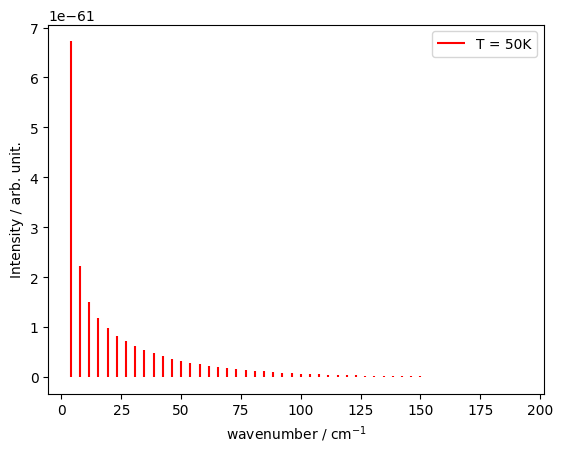

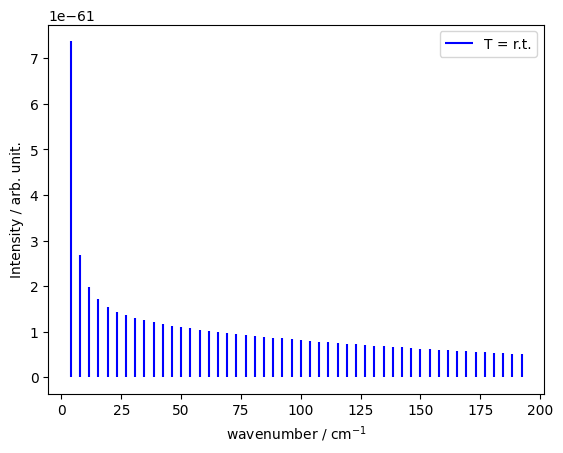

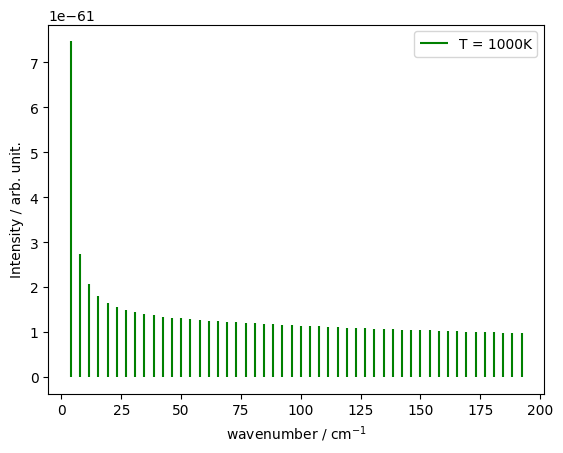

In [57]:
t4pPC.centerTitle("Simulated spectrum")
m12C = mm.ELEMENTS["C"].isotopes[12].mass
m16O = mm.ELEMENTS["O"].isotopes[16].mass
M12C = m12C*u2kg
M16O = m16O*u2kg
print(f"Mass of 12C = {m12C} u = {M12C} kg")
print(f"Mass of 16O = {m16O} u = {M16O} kg")

BbarCO = 1.922529*100 #cm-1 to m-1
muCO = 0.15*D2Cm #D to C.m
T50   =   50 #K
Trt   =  298.15 #K
T1000 = 1000.0 #K

nPeaks = 50
waveJ = np.zeros(nPeaks)
IntJ50 = np.zeros(nPeaks)
IntJrt = np.zeros(nPeaks)
IntJ1000 = np.zeros(nPeaks)
ymin = np.zeros(nPeaks)
for J in range(nPeaks):
    waveJ[J] = nu_(J).subs({Bbar_:BbarCO})
    IntJ50[J] = IntA_(J).subs({T_: T50, kB_: kB, mu0_: muCO, h_: h, c_: c, Bbar_:BbarCO})
    IntJrt[J] = IntA_(J).subs({T_: Trt, kB_: kB, mu0_: muCO, h_: h, c_: c, Bbar_:BbarCO})
    IntJ1000[J] = IntA_(J).subs({T_: T1000, kB_: kB, mu0_: muCO, h_: h, c_: c, Bbar_:BbarCO})
    # print(waveJ[J], IntJ[J])

plt.vlines(waveJ/100,ymin,IntJ50,label="T = 50K",color="r")
plt.xlabel("wavenumber / cm$^{-1}$")
plt.ylabel("Intensity / arb. unit.")
plt.legend()
plt.show()
plt.vlines(waveJ/100,ymin,IntJrt,label="T = r.t.",color="b")
plt.xlabel("wavenumber / cm$^{-1}$")
plt.ylabel("Intensity / arb. unit.")
plt.legend()
plt.show()
plt.vlines(waveJ/100,ymin,IntJ1000,label="T = 1000K",color="g")
plt.xlabel("wavenumber / cm$^{-1}$")
plt.ylabel("Intensity / arb. unit.")
plt.legend()
plt.show()

# End

In [21]:
vID.end(cwd0)

**End at:** Tuesday 13 February 2024, 09:24:04  
**Duration:** 00:00:08 371ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>

# Appendix

In [10]:
t4pPC.centerTitle("Atomic masses setup")

# Question 1
mH = mm.ELEMENTS["H"].isotopes[1].mass
mO = mm.ELEMENTS["O"].mass

# Question 2
MH = mH*u2kg
MO = mO*u2kg

print(f"Mass of H = {mH} u = {MH:.3e} kg")
print(f"Mass of O = {mO} u = {MO:.3e} kg")

t4pPC.centerTitle("Moment of inertia of a molecule")
from IPython.display import Math
display(Math('$$I = \sum_{i=1}^{N_\mathrm{atoms}} m_i x_i^2$$'))
display(Math(r"\text{where } x_i \text{ is the perpendicular distance of the atom } i \text{ from the axis of rotation}"))

t4pPC.centerTitle("Moment of inertia of Molécule 1")
rH = 101.0 * m.sin(m.radians(106.0/2))
print(f"Perpendicular distance of H atoms from the vertical axis = {rH:.1f} pm")
I = 2*MH*(rH*1e-12)**2
print(f"Moment of inertia I = {I:.3e} kg m^2")

t4pPC.centerTitle("Moment of inertia of Molécule 2")
rH = 105.0 * m.sin(m.radians(104.0/2))
print(f"Perpendicular distance of H atoms from the vertical axis = {rH:.1f} pm")
I = 2*MH*(rH*1e-12)**2
print(f"Moment of inertia I = {I:.3e} kg m^2")

t4pPC.centerTitle("Moment of inertia of Molécule 3")
rH = 98.0 * m.sin(m.radians(102.0/2))
print(f"Perpendicular distance of H atoms from the vertical axis = {rH:.1f} pm")
I = 2*MH*(rH*1e-12)**2
print(f"Moment of inertia I = {I:.3e} kg m^2")

t4pPC.centerTitle("Moment of inertia of Molécule 4")
rH = 109.0 * m.sin(m.radians(100.0/2))
print(f"Perpendicular distance of H atoms from the vertical axis = {rH:.1f} pm")
I = 2*MH*(rH*1e-12)**2
print(f"Moment of inertia I = {I:.3e} kg m^2")


Mass of H = 1.00782503223 u = 1.674e-27 kg
Mass of O = 15.999405 u = 2.657e-26 kg


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Perpendicular distance of H atoms from the vertical axis = 80.7 pm
Moment of inertia I = 2.178e-47 kg m^2


Perpendicular distance of H atoms from the vertical axis = 82.7 pm
Moment of inertia I = 2.291e-47 kg m^2


Perpendicular distance of H atoms from the vertical axis = 76.2 pm
Moment of inertia I = 1.941e-47 kg m^2


Perpendicular distance of H atoms from the vertical axis = 83.5 pm
Moment of inertia I = 2.334e-47 kg m^2
